# This notebook covers:

## 1. Linear Regression: using sk-learn library
----

Linear Regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted $x_{1}, x_{2} ... x_{n}$. The case of one explanatory variable is called simple linear regression. The graph below shows that the line is the linear relation between y and x. 

 
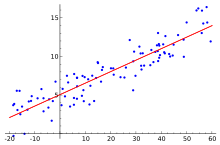	
    
    
Now the question is how we find this line and how we judge this line. In fact, we are looking for a linear relation between x and y with slope w and intercept b:  
    
$$ y = b + wx $$
    
Where w and b can be found by using the given data x and y. Using this linear equation we can predict future data.
    


----
For more than one independant variables $(x_{1}, x_{2}, x_{3}, … .. x_{n}) $ and only one dependent variable y, this is called multiple linear regression(MLR). 
     
$$y  = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n}  + b $$

or 
$$y = WX + b $$
  
where W is the weight vector, i.e. each independent varaible xi contributes its weight to the dependent variable y. Bias b is the intercept.

   

We wil use Sk-learn with boston house price dataset to demonstrate this multi-linear problem.

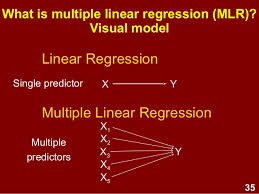

In [1]:
# load in data
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline

# loading data and split to train/test
data = load_boston()
type(data)


sklearn.utils.Bunch

In [2]:
import pandas as pd
boston = pd.DataFrame(data.data, columns=data.feature_names)

# features
print(boston.head() )

# # price
price = data.target
# type(price)
price[0:10]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [3]:
# split data into train/test 

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
# print("first row of X:\n", X_train[0, :])
# print("\nfirst row of y:", y_train[0])

print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


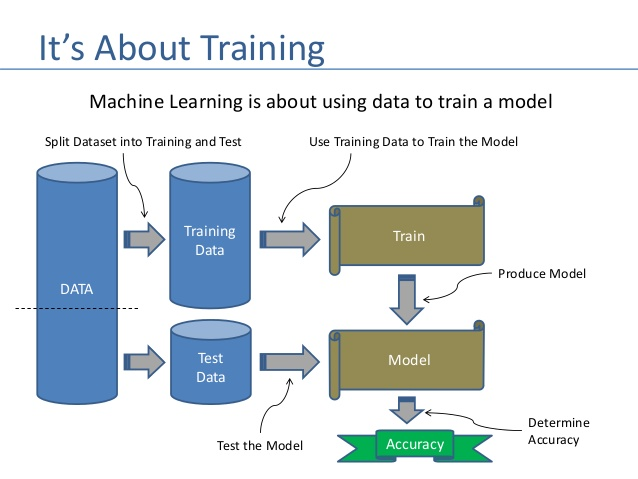

In [4]:
# use sklearn
from sklearn.linear_model import LinearRegression


# (1) select model
model = LinearRegression()
model

# (2) training model
model.fit(X_train, y_train)

# (3) Testing
y_pred = model.predict(X_test)

# accuracy
import numpy as np
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))


RMS: 5.319257498090792 


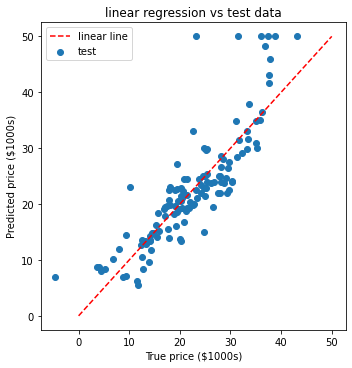

In [5]:
# plotting
plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_test, label="test")
plt.plot([0, 50], [0, 50], '--k', c='r', label='linear line')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.legend()
plt.title("linear regression vs test data")
plt.show()

### END of this notebook